Population Mean: 69.10546875
Bootstrap Mean (Average): 69.17696

Population Standard Deviation: 19.343201628981696
Bootstrap Standard Deviation (Average): 19.01902467947537

Population Percentiles: [62. 72. 80.]
Bootstrap Percentiles (Average): [62.9805 71.526  79.548 ]


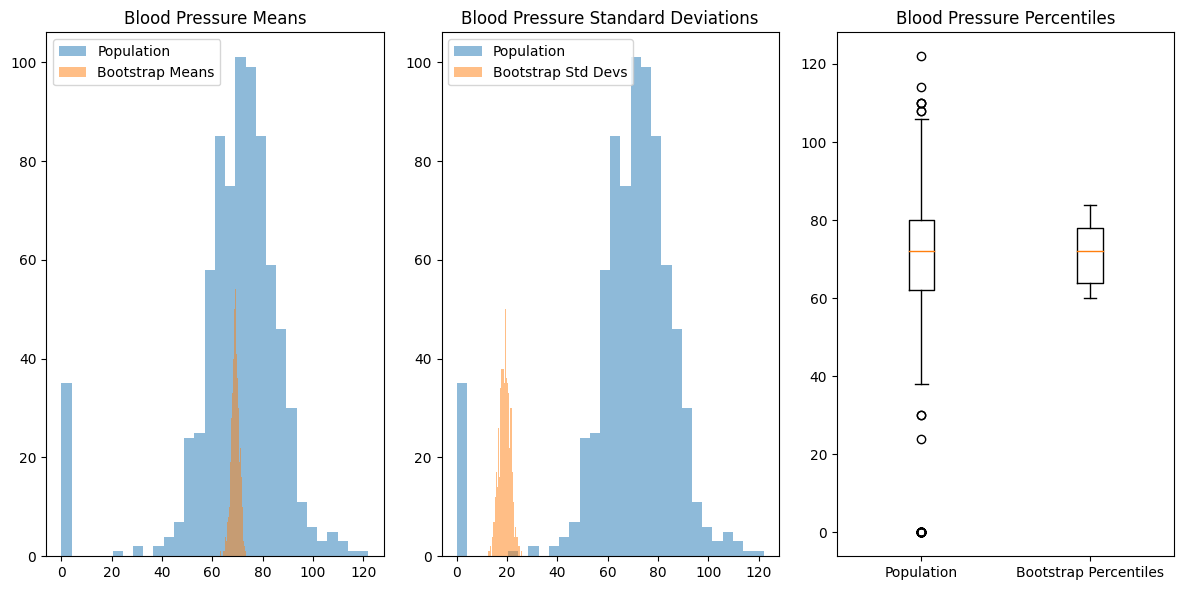

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/diabetes.csv')
population_blood_pressure = data['BloodPressure'].values
num_bootstrap_samples = 500
sample_size = 150
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []
for _ in range(num_bootstrap_samples):
      bootstrap_sample = np.random.choice(population_blood_pressure, size=sample_size, replace=True)
      bootstrap_means.append(np.mean(bootstrap_sample))
      bootstrap_std_devs.append(np.std(bootstrap_sample))
      bootstrap_percentiles.append(np.percentile(bootstrap_sample, [25, 50, 75]))

population_mean = np.mean(population_blood_pressure)
population_std_dev = np.std(population_blood_pressure)
population_percentiles = np.percentile(population_blood_pressure, [25, 50, 75])

print("Population Mean:", population_mean)
print("Bootstrap Mean (Average):", np.mean(bootstrap_means))

print("\nPopulation Standard Deviation:", population_std_dev)
print("Bootstrap Standard Deviation (Average):", np.mean(bootstrap_std_devs))

print("\nPopulation Percentiles:", population_percentiles)
print("Bootstrap Percentiles (Average):", np.mean(bootstrap_percentiles, axis=0))

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(population_blood_pressure, bins=30, alpha=0.5, label='Population')
plt.hist(bootstrap_means, bins=30, alpha=0.5, label='Bootstrap Means')
plt.title('Blood Pressure Means')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(population_blood_pressure, bins=30, alpha=0.5, label='Population')
plt.hist(bootstrap_std_devs, bins=30, alpha=0.5, label='Bootstrap Std Devs')
plt.title('Blood Pressure Standard Deviations')
plt.legend()

plt.subplot(1, 3, 3)
plt.boxplot([population_blood_pressure, np.array(bootstrap_percentiles).flatten()],
            labels=['Population', 'Bootstrap Percentiles'])
plt.title('Blood Pressure Percentiles')

plt.tight_layout()
plt.show()

